In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [136]:
df=pd.read_csv("/Users/abiodun/Downloads/DATA SET/FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [137]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [138]:
df.shape

(1067, 13)

In [139]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


/Users/abiodun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VEHICLECLASS', ylabel='count'>

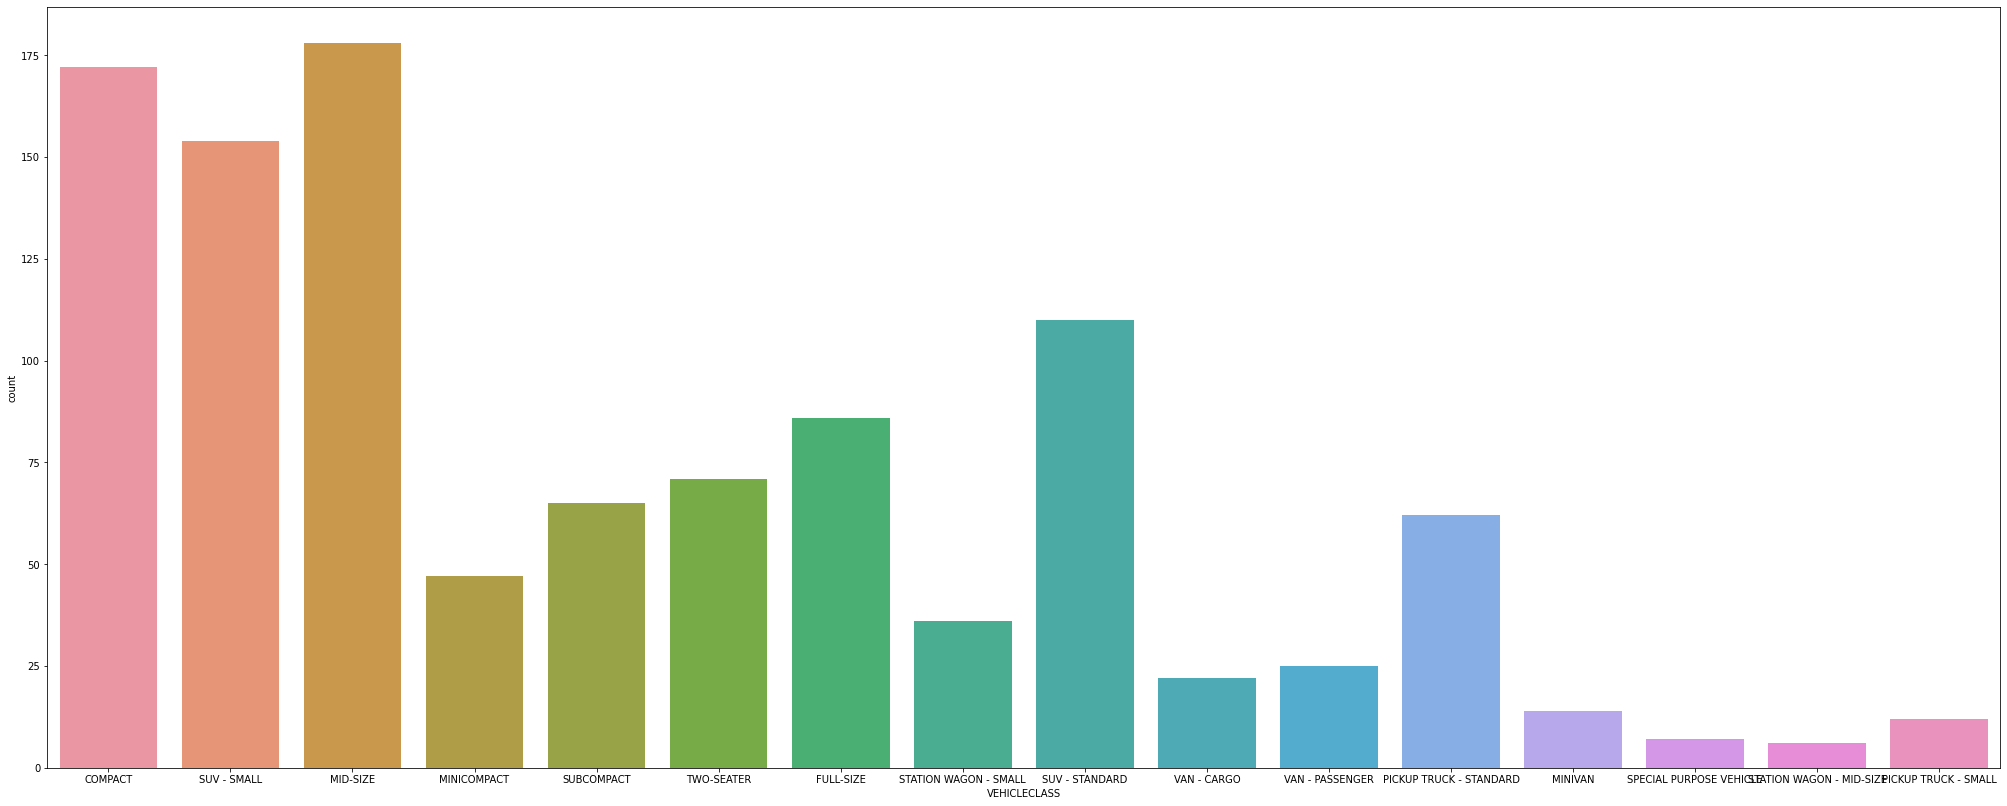

In [141]:
height = 35
weight = 14
plt.figure(figsize=(height,weight))
sns.countplot(df["VEHICLECLASS"])

/Users/abiodun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FUELTYPE', ylabel='count'>

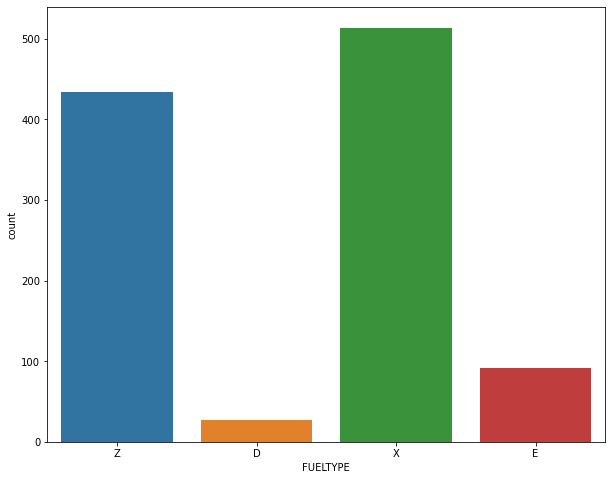

In [142]:
height = 10
weight = 8
plt.figure(figsize=(height,weight))
sns.countplot(df["FUELTYPE"])

/Users/abiodun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRANSMISSION', ylabel='count'>

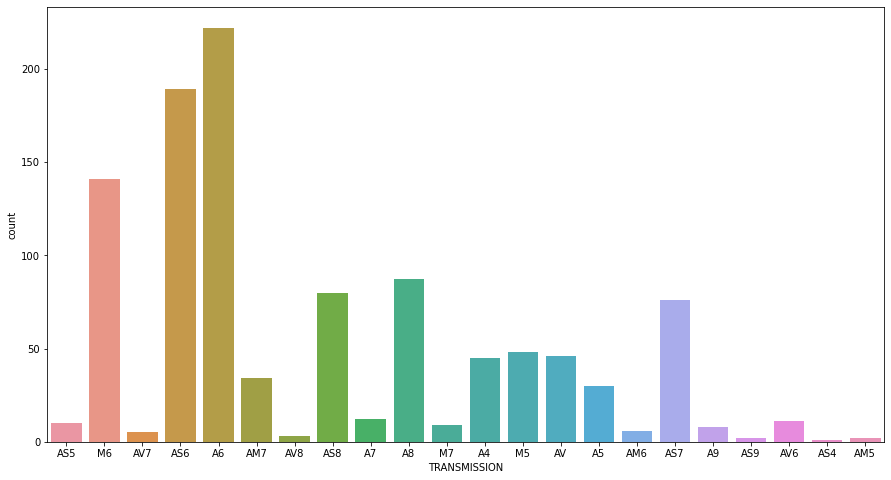

In [143]:
height = 15
weight = 8
plt.figure(figsize=(height,weight))
sns.countplot(df["TRANSMISSION"])

In [144]:
fuel= pd.get_dummies(df["FUELTYPE"])

In [145]:
df = pd.concat([df,fuel], axis = 1)

In [146]:
df.drop(columns = "FUELTYPE", inplace = True)

In [147]:
y = df[["CO2EMISSIONS"]]

In [148]:
x = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',
        'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','D','E','X','Z']]

                                        
                                            TRAIN - TEST - SPLIT

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =1)

In [151]:
x_train.shape

(853, 10)

In [152]:
x_test.shape

(214, 10)

In [153]:
lr = LinearRegression()

In [154]:
lr.fit(x_train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',
        'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','D','E','X','Z']],y_train)

LinearRegression()

In [155]:
lr.score(x_train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',
        'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','D','E','X','Z']],y_train)

0.9927673462971596

In [156]:
lr.score(x_test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',
        'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','D','E','X','Z']],y_test)

0.9922316474577983

In [157]:
from sklearn.model_selection import cross_val_score

In [158]:
Rcross = cross_val_score(lr,x[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',
        'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','D','E','X','Z']],y,cv = 4)

In [160]:
Rcross.mean()

0.9907998731949186

In [161]:
Rcross.std()

0.006362178822130464

In [162]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.9907998731949186 and the standard deviation is 0.006362178822130464


In [163]:
from sklearn.model_selection import cross_val_predict

In [164]:
Pcross = cross_val_predict(lr,x[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',
        'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','D','E','X','Z']],y,cv = 4)

In [170]:
Pcross[0:5]

array([[196.38481471],
       [221.36518127],
       [128.51710967],
       [258.27515729],
       [246.65621623]])

In [171]:
y[0:5]

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244



                                    DISTRIBUTION PLOT


In [172]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

/Users/abiodun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/abiodun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


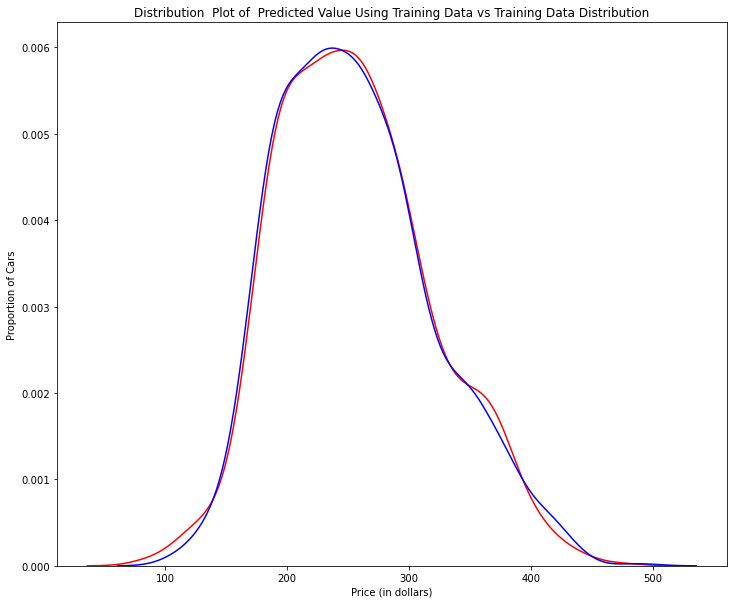

In [173]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(Pcross, y, "Actual Values (y)", "Predicted Values (Pcross)", Title)

In [174]:
Pcross= pd.DataFrame(Pcross)

In [175]:
df= pd.concat([df,Pcross], axis = 1)

In [178]:
df.rename(columns = {0:"CO2EMISSIONS_Predict"}, inplace = True)

In [179]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,D,E,X,Z,CO2EMISSIONS_Predict
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,9.9,6.7,8.5,33,196,0,0,0,1,196.384815
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,11.2,7.7,9.6,29,221,0,0,0,1,221.365181
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,6.0,5.8,5.9,48,136,0,0,0,1,128.517110
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,12.7,9.1,11.1,25,255,0,0,0,1,258.275157
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,12.1,8.7,10.6,27,244,0,0,0,1,246.656216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,13.4,9.8,11.8,24,271,0,0,1,0,273.793014
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,13.2,9.5,11.5,25,264,0,0,1,0,266.468296
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,13.4,9.8,11.8,24,271,0,0,1,0,273.793014
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,12.9,9.3,11.3,25,260,0,0,1,0,263.429566
